# Preparation and Overview


## Buisness Use Case

TODO: Explain the task and what business-case or use-case it is designed to solve (or designed to investigate). Detail exactly what the classification task is and what parties would be interested in the results. For example, would the model be deployed or used mostly for offline analysis? As in previous labs, also detail how good the classifier needs to perform in order to be useful. 


## Data Preprocessing

In [61]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('austinHousingData.csv')

#
# Update columns
#

# Drop Street Address, description, homeImage
data = data.drop(['zpid', 'garageSpaces', 'streetAddress', 'description', 'homeImage', 'numOfPhotos', 'latestPriceSource', 'numPriceChanges'], axis=1)

# Remove extreme outliers
third_quartile = data['latestPrice'].quantile(0.75)
first_quartile = data['latestPrice'].quantile(0.25)
IQR = third_quartile - first_quartile

initial_count = data.shape[0]
data = data[data['latestPrice'] < (third_quartile + 3 * IQR)]
data = data[data['latestPrice'] > (first_quartile - 3 * IQR)]
print("Number of outliers removed: ", initial_count - data.shape[0])

# Set the latestPrice to a categorical variable
data['latestPrice'] = pd.cut(data['latestPrice'], 
                             bins=[0, 
                                   data['latestPrice'].quantile(0.33), 
                                   data['latestPrice'].quantile(0.66), 
                                   data['latestPrice'].max()], 
                             labels=['Low', 'Medium', 'High'])

#
# Display Data information
#

# Print the first 5 rows of the dataframe.
data.head()


Number of outliers removed:  513


,city,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,pflugerville,78660,30.430632,-97.663078,1.98,2,True,True,True,True,...,0,1,1,1.266667,2.666667,1063,14,3.0,4,2
1,pflugerville,78660,30.432673,-97.661697,1.98,2,True,True,True,True,...,0,1,1,1.400000,2.666667,1063,14,2.0,4,1
2,pflugerville,78660,30.409748,-97.639771,1.98,0,True,True,False,True,...,2,1,1,1.200000,3.000000,1108,14,2.0,3,1
3,pflugerville,78660,30.432112,-97.661659,1.98,2,True,True,True,True,...,0,1,1,1.400000,2.666667,1063,14,2.0,3,1
4,pflugerville,78660,30.437368,-97.656860,1.98,0,True,True,False,True,...,0,1,1,1.133333,4.000000,1223,14,3.0,3,2


TODO: Add a description of the data preprocessing steps and explain decisions made

## Data Quality

In [62]:
# TODO: Copy similar code from Lab 1 to display: data types/description, missing values, duplicate rows, etc.

In [63]:
# Variable Breakdown
data.describe() # TODO: We could probably make this more relevant to the data by only showing the relevant columns (i.e. not the ID columns, binary columns should be shown as counts, etc.)

,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latest_salemonth,latest_saleyear,numOfAccessibilityFeatures,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,...,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000,14658.000000
mean,78736.360076,30.291285,-97.777458,1.994561,1.201392,1.196753,1988.247101,6.719607,2019.073407,0.012621,...,0.044344,1.032678,0.983081,1.824960,5.740649,1234.836062,14.836540,2.605025,3.407150,1.453882
std,18.813433,0.098254,0.085342,0.053957,1.318840,1.319437,21.428899,3.143685,0.813386,0.178817,...,0.226084,0.249629,0.285393,1.046277,1.862691,329.232708,1.755436,0.940756,0.826083,0.518033
min,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1906.000000,1.000000,2018.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,78727.000000,30.201381,-97.836798,1.980000,0.000000,0.000000,1974.000000,4.000000,2018.000000,0.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,78739.000000,30.282641,-97.768124,1.980000,1.000000,1.000000,1992.000000,7.000000,2019.000000,0.000000,...,0.000000,1.000000,1.000000,1.566667,5.666667,1277.000000,15.000000,3.000000,3.000000,1.000000
75%,78749.000000,30.368274,-97.715643,1.980000,2.000000,2.000000,2006.000000,9.000000,2020.000000,0.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,12.000000,2021.000000,8.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


TODO: Determine if we need to do any further discussion of the data descriptions here.

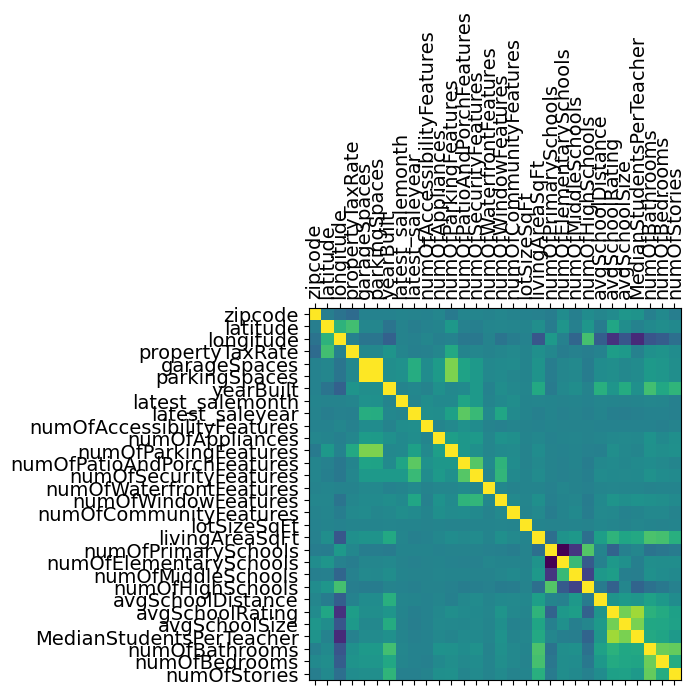

In [64]:
# Correlation Heatmap
num_data = data.select_dtypes(include=[np.number])
plt.matshow(num_data.corr())
plt.xticks(range(num_data.shape[1]), num_data.columns, fontsize=14, rotation=90)
plt.yticks(range(num_data.shape[1]), num_data.columns, fontsize=14)
plt.show()


## Data Splitting

In [65]:
from sklearn.model_selection import train_test_split

# Split the data into a training and test set.
train, test = train_test_split(data, test_size=0.2, random_state=23)

TODO: Argue "for" or "against" splitting your data using an 80/20 split. That is, why is the 80/20 split appropriate (or not) for your dataset?

# Modeling (5 points total)
The implementation of logistic regression must be written only from the examples given to you by the instructor. No credit will be assigned to teams that copy implementations from another source, regardless of if the code is properly cited. 
[2 points] Create a custom, one-versus-all logistic regression classifier using numpy and scipy to optimize. Use object oriented conventions identical to scikit-learn. You should start with the template developed by the instructor in the course. You should add the following functionality to the logistic regression classifier:
Ability to choose optimization technique when class is instantiated: either steepest ascent, stochastic gradient ascent, and Newton's method. It is recommended to call this the "solver" input for the class.
Update the gradient calculation to include a customizable regularization term (either using no regularization, L1 regularization, L2 regularization, or both L1 and L2 regularization). Associate a cost with the regularization term, "C", that can be adjusted when the class is instantiated.  
[1.5 points] Train your classifier to achieve good generalization performance. That is, adjust the optimization technique and the value of the regularization term(s) "C" to achieve the best performance on your test set. Visualize the performance of the classifier versus the parameters you investigated.
Is your method of selecting parameters justified? That is, do you think there is any "data snooping" involved with this method of selecting parameters?
[1.5 points] Compare the performance of your "best" logistic regression optimization procedure to the procedure used in scikit-learn. Visualize the performance differences in terms of training time and classification performance. Discuss the results. 


In [66]:
import numpy as np
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    

In [67]:
# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 


In [68]:
# now lets do some vectorized coding
import numpy as np
from scipy.special import expit

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)


In [69]:
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    
lr = LogisticRegression(0.1,1500)

#  Select columns for X and y
X = train[['numOfBedrooms', 'numOfBathrooms', 'numOfStories']]


y = train['latestPrice']

lr.fit(X.values,y.values)
print(lr)

MultiClass Logistic Regression Object with coefficients:
[[-2.78773531 -0.081504    1.16746619 -0.47616046]
 [ 1.25536035 -0.1717686  -0.72052342  0.29861416]
 [-0.11281241  0.09180874 -0.3908553   0.05583164]]


In [70]:
from sklearn.metrics import accuracy_score

# Now we can predict the test set
X_test = test.drop('latestPrice', axis=1)
X_test = X_test[['numOfBedrooms', 'numOfBathrooms', 'numOfStories']]

y_test = test['latestPrice']

yhat = lr.predict(X_test.values)

print('Accuracy of: ',accuracy_score(y_test,yhat))


Accuracy of:  0.4805593451568895


# Deployment (1 points total)
Which implementation of logistic regression would you advise be used in a deployed machine learning model, your implementation or scikit-learn (or other third party implementation)? Why?


# Exceptional Work (1 points total)
You have free reign to provide additional analyses. One idea: Update the code to use either "one-versus-all" or "one-versus-one" extensions of binary to multi-class classification. 
Required for 7000 level students: Implement an optimization technique for logistic regression using mean square error as your objective function (instead of maximum likelihood). Derive the gradient updates for the Hessian and use Newton's method to update the values of "w". Then answer, which process do you prefer: maximum likelihood OR minimum mean-squared error? 